In [6]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import fluids as fl
from pint import _DEFAULT_REGISTRY as u

In [7]:
#converter function
def convertFunc():
    massFlow = 0.125*(u.kilogram/u.second)
    density = 360.12*(u.kilogram/u.meter**3)
    viscosity = 29.380*(u.micropascal*u.second)
    roughness = 0.00001*(u.meter)
    minDiam = 0.1*(u.inch)
    maxDiam = 5*(u.inch)
    diamStep = 0.01*(u.inch)
    straightLength = 2*(u.meter)
    bendAngle = 45*(u.degrees)
    
    # add innumbends anglebends fittings valves

    #variables to standard units
    massFlowS = massFlow.to("kilogram/second")
    densityS = density.to("kilogram/meter**3")
    viscosityS = viscosity.to("pascal*second")
    roughnessS = roughness.to("meter")
    minDiamS = minDiam.to("meter")
    maxDiamS = maxDiam.to("meter")
    diamStepS = diamStep.to("meter")
    straightlengthS = straightLength.to("meter")
    bendAngleS = bendAngle.to("degrees")
    return massFlowS, densityS, viscosityS, roughnessS, minDiamS, maxDiamS, diamStepS, straightlengthS
    
#def printFunc():
    #massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength = convertFunc()

    #print(massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength)

    #add dictionary to easily assign numbers to variables

#printFunc()

In [8]:
def variablesFunc():
    #Input Variables, Units are Assigned
    massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength = convertFunc()
    
    #Calculated Variables
    diamRange = (np.arange(minDiam.magnitude, maxDiam.magnitude, diamStep.magnitude))*(u.meter)
    areaRange = np.square(diamRange / (2*u.dimensionless)) * np.pi*(u.dimensionless)
    velocityRange = np.divide((massFlow), (areaRange * density))

    #Creating Empty Arrays For Variable Ranges
    reynoldsRange = np.empty(len(diamRange))
    frictionFactorRange = np.empty(len(diamRange))
    kFactorRange = np.empty(len(diamRange))
    pressureDropRange = np.empty(len(diamRange))
    

    #Iterating Through Diameters, Calculating Variable Ranges
    for i in np.arange(0, len(diamRange), 1):
        reynoldsRange[i] = fl.units.Reynolds(V=velocityRange[i], mu = viscosity, rho = density, D = diamRange[i])
        frictionFactorRange[i] = fl.units.friction_factor(Re = reynoldsRange[i], eD = np.divide(roughness,diamRange[i]), Darcy = True)
        kFactorRange[i] = fl.units.K_from_f(fd = frictionFactorRange[i], L = straightLength, D = diamRange[i])
        pressureDrop = fl.units.dP_from_K(K = kFactorRange[i], rho = density, V = velocityRange[i]) #Variable to temporarily store pressure drop

        pressureDropRange[i] = pressureDrop.magnitude #Array collects all pressure drop values
        
    pressureDropRange = pressureDropRange * pressureDrop.units #Unit is taken from the last pressure drop value and added here (done bc you can't add pint quantities to np arrays)

    #Plots Diameter Against Pressure Drop
    fig, ax = plt.subplots()
    varPlot = ax.plot(diamRange.to("inch"), pressureDropRange.to("psi"))
    ax.grid(visible = True)
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    ax.set_xlabel("Diameter (Inches)")
    ax.set_ylabel("Pressure Drop (psi)")
    plt.axvline(x = 0.165, color = 'r', linestyle = '-')
    plt.xticks(np.arange(0, 5+0.5, 0.25), rotation = 'vertical')
    plt.show()

    return density, velocityRange, diamRange, straightLength, frictionFactorRange, pressureDropRange

c:\Users\goose\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


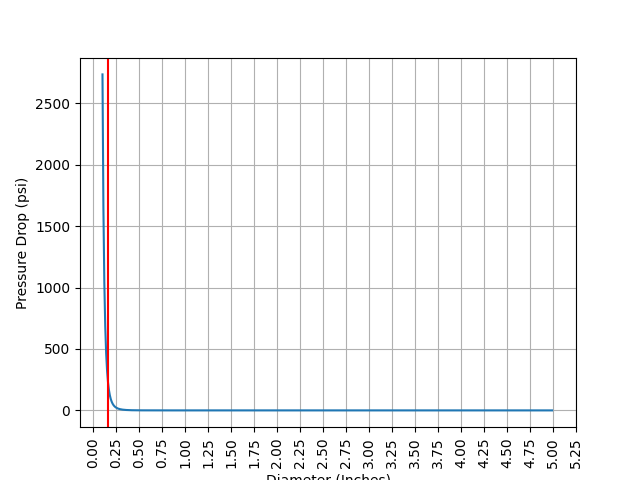

(360.12 <Unit('kilogram / meter ** 3')>,
 array([6.85023479e+01, 5.66135106e+01, 4.75710749e+01, 4.05339337e+01,
        3.49501775e+01, 3.04454879e+01, 2.67587296e+01, 2.37032346e+01,
        2.11427000e+01, 1.89757196e+01, 1.71255870e+01, 1.55334122e+01,
        1.41533777e+01, 1.29494041e+01, 1.18927687e+01, 1.09603757e+01,
        1.01334834e+01, 9.39675554e+00, 8.73754437e+00, 8.14534458e+00,
        7.61137199e+00, 7.12823599e+00, 6.68968241e+00, 6.29039007e+00,
        5.92580864e+00, 5.59202840e+00, 5.28567499e+00, 5.00382380e+00,
        4.74392991e+00, 4.50377041e+00, 4.28139674e+00, 4.07509506e+00,
        3.88335305e+00, 3.70483223e+00, 3.53834442e+00, 3.38283199e+00,
        3.23735103e+00, 3.10105694e+00, 2.97319218e+00, 2.85307571e+00,
        2.74009392e+00, 2.63369273e+00, 2.53337085e+00, 2.43867383e+00,
        2.34918888e+00, 2.26454043e+00, 2.18438609e+00, 2.10841329e+00,
        2.03633614e+00, 1.96789279e+00, 1.90284300e+00, 1.84096608e+00,
        1.78205900e+00,

In [9]:
variablesFunc()


In [10]:
#ALL DEBUGGING
#PROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELL
testPDrop = fl.units.dP_from_K(K = 1.0, rho = 1.0*(u.kilogram / u.meter **3), V = 1.0*(u.meter / u.second))
print(testPDrop)

a = [1, 2, 3]
b = 1 * (u.kilogram / u.meter **3)
c = [1, 2, 3] * (u.meter / u.second)
AHH = np.empty(1)

A = 1 * u.meter
B = 2 * u.meter

bruh = np.empty(1)

bruh = [A, B]
print(bruh)

AHHRange = np.empty(len(a))

for i in np.arange(0, len(a), 1):
    AHH = fl.units.dP_from_K(K = a[i], rho = b, V = c[i])
    AHHRange[i] = AHH.magnitude

print(AHHRange * AHH.units)

0.5 pascal
[<Quantity(1, 'meter')>, <Quantity(2, 'meter')>]
[0.5 4.0 13.5] pascal
